In [1]:
import nltk

In [2]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [13]:
data = pd.read_csv(r"E:\Digital_University\Sem_2\Predictive Analytics\Datasets\spam_dataset.csv", encoding='cp1252')
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [15]:
data.dtypes

Category    object
Message     object
dtype: object

In [16]:
data.shape

(5572, 2)

In [17]:
print(data['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


In [18]:
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
s=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DBR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DBR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DBR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
le=WordNetLemmatizer()
def preprocess(x):
    l=x.lower()
    t=nltk.word_tokenize(l)
    p=[i for i in t if i not in string.punctuation]
    sw=[i for i in p if i not in s ]
    t_l=[le.lemmatize(i) for i in sw]
    return ' '.join(t_l)

In [21]:
data['Category']=data['Category'].map({'ham':1,'spam':0})

In [22]:
x=data.iloc[:,-1]
y=data.iloc[:,0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline=Pipeline([
    ("Tfid",TfidfVectorizer(preprocessor=preprocess)),
    ("nb",MultinomialNB())
    ])

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=True)

In [25]:
pipeline.fit(x_train,y_train)
pipeline_predict=pipeline.predict(x_test)

In [26]:
import joblib
joblib.dump(pipeline, "spam_classifier.pkl")

['spam_classifier.pkl']

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipeline_predict))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       185
           1       0.97      1.00      0.99      1208

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



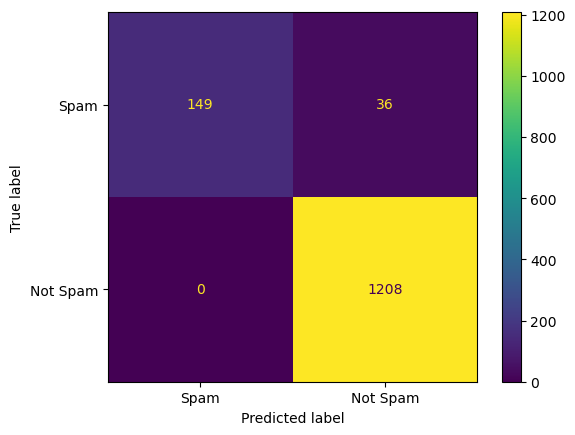

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pipeline_predict)
class_names = ['Spam', 'Not Spam']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()